In [1]:
import pandas as pd

In [2]:
houses = pd.read_csv('AmesHousing.csv')

## Individual Values

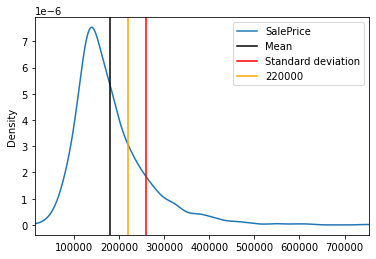

In [3]:
import matplotlib.pyplot as plt
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                    )
                            )

st_dev = houses['SalePrice'].std(ddof = 0) # without using Bessel's correction
mean = houses['SalePrice'].mean()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean + st_dev, color = 'Red', label = 'Standard deviation')
plt.axvline(220000, color = 'Orange', label = '220000')
plt.legend()

very_expensive = False

## Number of Standard Deviations

In [5]:
distance = 220000 - houses['SalePrice'].mean()
st_devs_away = distance / houses['SalePrice'].std(ddof = 0)
st_devs_away

0.4908280788718362

## Z-scores

In [6]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])

In [7]:
min_z

-2.1034258973406126

In [8]:
mean_z

0.0

In [9]:
max_z

7.188956446929806

## Locating Values in Different Distributions

In [11]:
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z
# Segmenting the data by location
north_ames = houses[houses['Neighborhood'] == 'NAmes']
clg_creek = houses[houses['Neighborhood'] == 'CollgCr']
old_town = houses[houses['Neighborhood'] == 'OldTown']
edwards = houses[houses['Neighborhood'] == 'Edwards']
somerset = houses[houses['Neighborhood'] == 'Somerst']

# Finding the z-score for 200000 for every location
z_by_location = {}
for data, neighborhood in [(north_ames, 'NAmes'), (clg_creek, 'CollgCr'),
                     (old_town, 'OldTown'), (edwards, 'Edwards'),
                     (somerset, 'Somerst')]:
    
    z_by_location[neighborhood] = z_score(200000, data['SalePrice'],
                                          bessel = 0)

# Finding the location with the z-score closest to 0
print(z_by_location)

{'NAmes': 1.7239665910370237, 'CollgCr': -0.03334366282705464, 'OldTown': 1.7183080926865524, 'Edwards': 1.443576193848941, 'Somerst': -0.5186390646965722}


In [12]:
best_investment = 'College Creek'

## Transforming Distributions

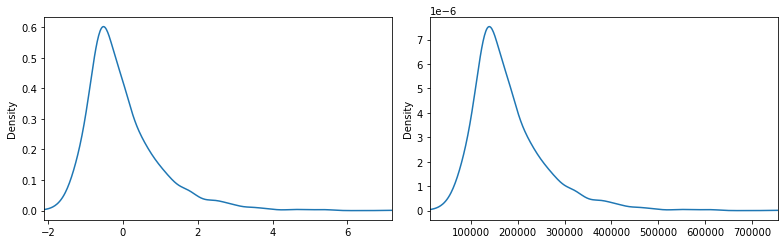

In [14]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(lambda x: ((x - mean) / st_dev))

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),houses['z_prices'].max()))
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),houses['SalePrice'].max()))
plt.tight_layout() # otherwise the plots will overlay partially

In [22]:
z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof = 0)

In [23]:
z_mean_price

-1.1429992333726227e-16

In [24]:
z_stdev_price

1.0000000000000002

In [25]:
# Transforming 'Lot Area'
mean_area = houses['Lot Area'].mean()
stdev_area = houses['Lot Area'].std(ddof = 0)
houses['z_area'] = houses['Lot Area'].apply(lambda x: ((x - mean_area) / stdev_area))

z_mean_area = houses['z_area'].mean()
z_stdev_area = houses['z_area'].std(ddof = 0)

In [26]:
z_mean_area

9.079767654464271e-17

In [27]:
z_stdev_area

1.0000000000000013

## The Standard Distribution

In [29]:
from numpy import std,mean
population = [0,8,0,8]
mean_pop = mean(population)
stdev_pop = std(population, ddof = 0)

standardized_pop = []
for value in population:
    z = (value - mean_pop) / stdev_pop
    standardized_pop.append(z)
    
mean_z = mean(standardized_pop)
stdev_z = std(standardized_pop, ddof = 0)

In [30]:
mean_z

0.0

In [31]:
stdev_z

1.0

##  Standardizing Samples

In [34]:
sample = [0,8,0,8]
x_bar = mean(sample)
s = std(sample, ddof = 1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)

print(standardized_sample)

[-0.8660254037844387, 0.8660254037844387, -0.8660254037844387, 0.8660254037844387]


In [35]:
print(mean(standardized_sample))

0.0


In [36]:
print(std(standardized_sample)) # ddof = 0 by default

0.8660254037844387


In [33]:
sample = [0,8,0,8]

x_bar = mean(sample)
s = std(sample, ddof = 1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)
    
stdev_sample = std(standardized_sample,ddof = 1)
stdev_sample

1.0